##**Dataset**
Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, V1, doi: 10.17632/4drtyfjtfy.1

https://data.mendeley.com/datasets/4drtyfjtfy/1



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import matplotlib.image as img
import skimage.io as io
import sklearn.utils as utils
import skimage.transform as trans

2.9.2


##**遭遇問題-1**
zip解壓後是一堆圖檔，無標籤，副檔名，圖片大小未統一

## **解法**
手動將檔案分進不同資料夾並統一命名

In [2]:
class_names = ['cloudy','rain','shine','sunrise']
classnum = len(class_names)
datanum = np.array([300,215,253,357]).astype(int)
# divnum = datanum*0.8
# divnum = divnum.astype(int)
labels = []
for i in range(classnum):
  labels.append(i)

In [3]:
# print(divnum,labels, sep='\n')

In [4]:
#filepath
rootfolder = '/content/drive/MyDrive/Project/20221003_weather_classification/dataset2'
classfolder = []
filename = []
for i in labels:
  classfolder.append('/'+class_names[i])
  filename.append([])
  for j in range(1,(datanum[i]+1)):
    tmpstr = '/'+class_names[i]+' ('+str(j)+').jpg'
    filename[i].append(tmpstr)

In [5]:
print(classfolder,filename, sep='\n')

['/cloudy', '/rain', '/shine', '/sunrise']
[['/cloudy (1).jpg', '/cloudy (2).jpg', '/cloudy (3).jpg', '/cloudy (4).jpg', '/cloudy (5).jpg', '/cloudy (6).jpg', '/cloudy (7).jpg', '/cloudy (8).jpg', '/cloudy (9).jpg', '/cloudy (10).jpg', '/cloudy (11).jpg', '/cloudy (12).jpg', '/cloudy (13).jpg', '/cloudy (14).jpg', '/cloudy (15).jpg', '/cloudy (16).jpg', '/cloudy (17).jpg', '/cloudy (18).jpg', '/cloudy (19).jpg', '/cloudy (20).jpg', '/cloudy (21).jpg', '/cloudy (22).jpg', '/cloudy (23).jpg', '/cloudy (24).jpg', '/cloudy (25).jpg', '/cloudy (26).jpg', '/cloudy (27).jpg', '/cloudy (28).jpg', '/cloudy (29).jpg', '/cloudy (30).jpg', '/cloudy (31).jpg', '/cloudy (32).jpg', '/cloudy (33).jpg', '/cloudy (34).jpg', '/cloudy (35).jpg', '/cloudy (36).jpg', '/cloudy (37).jpg', '/cloudy (38).jpg', '/cloudy (39).jpg', '/cloudy (40).jpg', '/cloudy (41).jpg', '/cloudy (42).jpg', '/cloudy (43).jpg', '/cloudy (44).jpg', '/cloudy (45).jpg', '/cloudy (46).jpg', '/cloudy (47).jpg', '/cloudy (48).jpg', '/cl

load image:
https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

In [6]:
#labels list
labelarray = []
for i in labels:
  tmp = np.full(datanum[i], i)
  labelarray=np.append(labelarray,tmp)
labellist = labelarray.astype(int).tolist()

In [7]:
#load image
# imagelist = []
# for i in labels:
#   fd = rootfolder+classfolder[i]
#   imagelist.append([])
#   for j in range(datanum[i]):
#     fp=fd+filename[i][j]
#     imagelist[i].append(io.imread(fp))
imagelist = []
width = 256
height = 256
for i in labels:
  fd = rootfolder+classfolder[i]
  for j in range(datanum[i]):
    fp=fd+filename[i][j]
    image = io.imread(fp)
    image_resized = trans.resize(image, (width ,height), anti_aliasing=True)
    imagelist.append(image_resized)

<class 'numpy.ndarray'>
float64
(256, 256, 3)


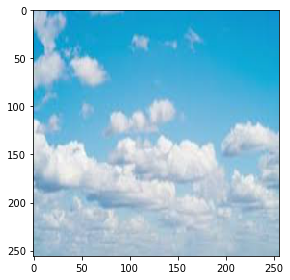

In [8]:
#show image
classindex = 2    #0,1,2,3
imageindex = 120   #300,215,253,357 (max)
index = np.sum(datanum[:classindex])+imageindex
image = imagelist[index]
print(type(image))
print(image.dtype)
print(image.shape)
io.imshow(image)

In [9]:
popindex=[]
for i in range(len(imagelist)):
  j=imagelist[i]
  if j.shape != (256,256,3) :
    # print(i,j.shape)
    popindex.append(i)
for index in sorted(popindex, reverse=True):
  del imagelist[index]
  del labellist[index]
datanum=len(labellist)

In [10]:
#to array
labelarray = np.array(labellist)
imagearray = np.stack(imagelist,axis=0)

In [11]:
# io.imshow(imagearray[666])

In [12]:
#shuffle
shuffler = np.random.permutation(datanum)
shuffledlabels = labelarray[shuffler]
shuffledimages = imagearray[shuffler]

In [13]:
# print(shuffledimages.shape)

In [14]:
#split
alldatanum = int(np.sum(datanum))
div = int(alldatanum*0.8)
train_images = shuffledimages[:div]
train_labels = shuffledlabels[:div]
test_images = shuffledimages[div:]
test_labels = shuffledlabels[div:]

In [15]:
# print(train_images.shape)

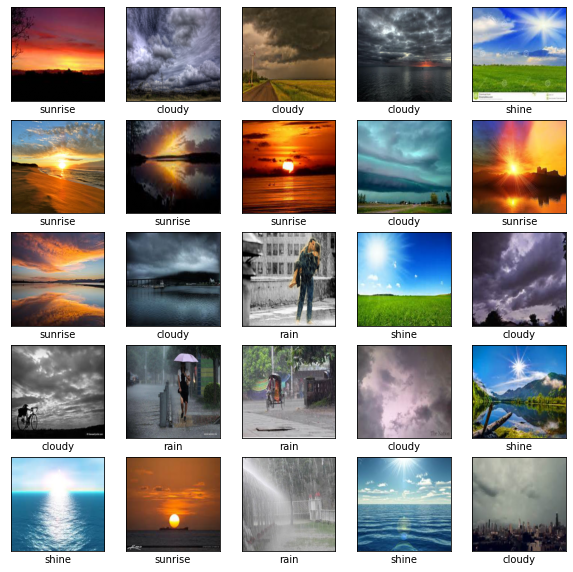

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(classnum)
])

In [25]:
model.compile(optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
28/28 [==============================] - 3s 98ms/step - loss: 0.5196 - accuracy: 0.7623
Epoch 2/20
28/28 [==============================] - 3s 95ms/step - loss: 0.5231 - accuracy: 0.7623
Epoch 3/20
28/28 [==============================] - 3s 97ms/step - loss: 0.4880 - accuracy: 0.8069
Epoch 4/20
28/28 [==============================] - 3s 97ms/step - loss: 0.4506 - accuracy: 0.8103
Epoch 5/20
28/28 [==============================] - 3s 96ms/step - loss: 0.4601 - accuracy: 0.8080
Epoch 6/20
28/28 [==============================] - 3s 96ms/step - loss: 0.4249 - accuracy: 0.8192
Epoch 7/20
28/28 [==============================] - 3s 97ms/step - loss: 0.4230 - accuracy: 0.8292
Epoch 8/20
28/28 [==============================] - 3s 97ms/step - loss: 0.5519 - accuracy: 0.7478
Epoch 9/20
28/28 [==============================] - 3s 99ms/step - loss: 0.4432 - accuracy: 0.8292
Epoch 10/20
28/28 [==============================] - 3s 123ms/step - loss: 0.3977 - accuracy: 0.8426
Epoch 11

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 0.5765 - accuracy: 0.8125 - 323ms/epoch - 46ms/step

Test accuracy: 0.8125


##**遭遇問題-2**
準確率很吃運氣，有時候一開始Loss就不大準確率也很快就超過0.8。但有時訓練了10個epoch準確率還在0.6那附近掙扎。

## **想法**
可不可以訓練n個epoch直到準確率跟loss達到一定標準為止XD